In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import warnings
import re
import math
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_absolute_error as mae,
    mean_squared_error as mse,
)


warnings.filterwarnings('ignore')

In [2]:
url_list = [
    'https://www.zomato.com/mumbai/delivery-in-powai',
    'https://www.zomato.com/mumbai/delivery-in-lower-parel',
    'https://www.zomato.com/mumbai/delivery-in-vashi',
    'https://www.zomato.com/mumbai/delivery-in-malad-west',
    'https://www.zomato.com/mumbai/delivery-in-malad-east',
    'https://www.zomato.com/mumbai/delivery-in-juhu',
    'https://www.zomato.com/mumbai/delivery-in-chembur',
    'https://www.zomato.com/mumbai/delivery-in-marol',
    'https://www.zomato.com/mumbai/delivery-in-khar',
    'https://www.zomato.com/mumbai/delivery-in-chakala',
    'https://www.zomato.com/mumbai/delivery-in-colaba',
    'https://www.zomato.com/mumbai/delivery-in-sakinaka',
    'https://www.zomato.com/mumbai/delivery-in-borivali-east',
    'https://www.zomato.com/mumbai/delivery-in-kandivali-west',
    'https://www.zomato.com/mumbai/delivery-in-churchgate'
]

In [3]:
for url in url_list:
    # Send a GET request 
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    
    # creating a soup object.
    soup = BeautifulSoup(response.text, 'html.parser')
    
    table = {
        'location':[],
        'resturant_names':[],
    }
    
    temp_rating = []
    location = soup.find('div',id='root').find('div',class_='sc-jGxEUC dOXmkw').find('div',class_='sc-1mo3ldo-0').text.strip().split('/')[-2]
    table['location'].append(location)
    for items in soup.find('div',id='root').find('div',class_='sc-jGxEUC dOXmkw').select('div',class_='sc-hPeUyl cKQNlu'):
        a = items.select('h4',class_='sc-1hp8d8a-0 sc-Ehqfj bxOQva')
        b = items.select('div',class_='sc-1q7bklc-1 cILgox')
        for i in a:
            if i is not None and i.text.strip() not in table['resturant_names']:
                table['resturant_names'].append(i.text.strip())
        for j in b:
            if j is not None and "Beverages" in j.text and "for one" in j.text and "min" in j.text:
                details = re.sub(r"(\D+)(\d+\.\d+)(\s*)(star-fill)(\S+)", r"\1 \2 \3\4 \5",j.text)
                temp_rating.append(details.replace('OFF',"OFF ").replace("Promoted","Promoted "))
            
    details_table = {
        'discount':[],
        'resturant_names':[],
        'rating':[],
        'espacial':[],
        'price':[],
        'delivery_time':[]
    }
    for name in table['resturant_names']:
        for sentence in temp_rating:
        
            # Search for the name and extract two words before and after
            match = re.search(rf"(\S+ \S+) {re.escape(name)} (\d+\.\d+) star-fill(.*?)Beverages(.\d+) for one (\d+ min)", sentence)
            if match:
                discount = match.group(1)  # Two words before the name
                rating = match.group(2)  # Number after the name
                espacial = match.group(3)
                price = match.group(4)
                delivery_time = match.group(5)
                
                details_table['discount'].append(discount.replace('min','').replace('Promoted',''))
                details_table['resturant_names'].append(name)
                details_table['rating'].append(rating)
                details_table['espacial'].append(espacial)
                details_table['price'].append(price)
                details_table['delivery_time'].append(delivery_time)      
    
    # creating a name for csv file.
    file_name = url.split('delivery-in-')[1]
    
    # creating a csv file.
    max_len = max(len(v) for v in table.values())

    for key in table:
        while len(table[key]) < max_len:
            table[key].append(None)  # Pad with None, or use "" or 0 if you prefer
    
    df = pd.DataFrame(table)

    df.to_csv(f'{file_name}.csv',index = False)
    
    # creating a file for details of resturant.

    max_len = max(len(v) for v in details_table.values())

    for key in details_table:
        while len(details_table[key]) < max_len:
            details_table[key].append(None)  # Pad with None, or use "" or 0 if you prefer
    
    df = pd.DataFrame(details_table)

    df.to_csv(f'{file_name}_details.csv',index = False)

## Data Pre-Processing

In [4]:
for url in url_list:
    file_name = url.split('delivery-in-')[1]
    df = pd.read_csv(f'{file_name}.csv')
    print(df.isnull().sum())
    location = df['location'][0]
    df.fillna(location,inplace = True)
    print(df.isnull().sum())
    
    # loading clean data back to csv file.
    df.to_csv(f'{file_name}.csv',index = False)    
    


location           8
resturant_names    0
dtype: int64
location           0
resturant_names    0
dtype: int64
location           8
resturant_names    0
dtype: int64
location           0
resturant_names    0
dtype: int64
location           8
resturant_names    0
dtype: int64
location           0
resturant_names    0
dtype: int64
location           8
resturant_names    0
dtype: int64
location           0
resturant_names    0
dtype: int64
location           8
resturant_names    0
dtype: int64
location           0
resturant_names    0
dtype: int64
location           8
resturant_names    0
dtype: int64
location           0
resturant_names    0
dtype: int64
location           8
resturant_names    0
dtype: int64
location           0
resturant_names    0
dtype: int64
location           8
resturant_names    0
dtype: int64
location           0
resturant_names    0
dtype: int64
location           8
resturant_names    0
dtype: int64
location           0
resturant_names    0
dtype: int64
location  

In [6]:
combined_df = pd.DataFrame()
for url in url_list:
    file_name = url.split('delivery-in-')[1] 
    resturant_df = pd.read_csv(f'{file_name}.csv')
    details_df = pd.read_csv(f'{file_name}_details.csv')
    
    merge_df = pd.merge(resturant_df, details_df, on = 'resturant_names', how = 'inner')
    combined_df = pd.concat([combined_df, merge_df])

combined_df.to_csv('restaurant_data.csv',index = False)    

In [7]:
df = pd.read_csv('restaurant_data.csv')

#### replace values and typecasting its data type.

In [8]:

df['location'] = df['location'].str.replace(' Restaurants','')

df['delivery_time'] = df['delivery_time'].str.replace('min','')
df['delivery_time'] = df['delivery_time'].astype(int)


df['price'] = df['price'].str.slice(1)
df['price'] = df['price'].astype(int)

#### removing duplicate values

In [9]:
df.drop_duplicates(inplace = True)

## Exploring the data (EDA)

In [10]:
df.shape

(57, 7)

In [11]:
df.head()

,location,resturant_names,discount,rating,espacial,price,delivery_time
0,Powai,McDonald's,10% OFF,4.4,"Burger, Fast Food, Cafe,",200,19
10,Powai,Theobroma,₹150 OFF,4.4,"Bakery, Desserts, Fast Food,",200,14
20,Powai,Pizza Hut,20% OFF,3.7,"Pizza, Italian, Fast Food, Desserts,",200,25
30,Lower Parel,Lil Gamby Pizza Shop And Bar,₹150 OFF,4.3,"Pizza, Sandwich, Pasta, Beverages, Coffee₹400...",200,33
31,Lower Parel,Pizza Hut,20% OFF,3.7,"Pizza, Italian, Fast Food, Desserts,",200,33


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 434
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         57 non-null     object 
 1   resturant_names  57 non-null     object 
 2   discount         57 non-null     object 
 3   rating           57 non-null     float64
 4   espacial         57 non-null     object 
 5   price            57 non-null     int32  
 6   delivery_time    57 non-null     int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 3.1+ KB


In [13]:
df['discount'].unique()

array(['10% OFF', '₹150 OFF', '20% OFF', '₹200 OFF', '₹175 OFF',
       '₹125 OFF', '30% OFF', '29 ', '₹100 OFF', '60% OFF'], dtype=object)

<Axes: >

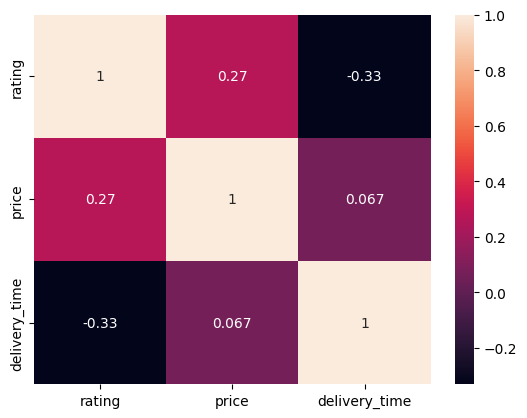

In [14]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot = True)

## Data Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 434
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         57 non-null     object 
 1   resturant_names  57 non-null     object 
 2   discount         57 non-null     object 
 3   rating           57 non-null     float64
 4   espacial         57 non-null     object 
 5   price            57 non-null     int32  
 6   delivery_time    57 non-null     int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 3.1+ KB


#### Find the average delivery time per location.

In [17]:
delivery_time_by_location = df.groupby('location', as_index=False).agg(
    avg_delivery_time=('delivery_time', 'mean')
)
delivery_time_by_location

,location,avg_delivery_time
0,Borivali East,20.200000
1,Chakala,22.500000
2,Chembur,30.000000
3,Churchgate,18.500000
4,Colaba,16.250000
5,Juhu,19.400000
6,Kandivali West,21.285714
7,Khar,21.250000
8,Lower Parel,25.000000
9,Malad East,23.333333


#### Find the lowest price in each location.

In [18]:
lowest_price = df.groupby('location', as_index=False).agg(
    price_in_RS = ('price', 'min')
)
lowest_price

,location,price_in_RS
0,Borivali East,150
1,Chakala,200
2,Chembur,200
3,Churchgate,150
4,Colaba,150
5,Juhu,200
6,Kandivali West,200
7,Khar,200
8,Lower Parel,200
9,Malad East,150


#### Find the Ratings by resturants.

In [19]:
ratings_by_resturants = df.groupby('resturant_names', as_index=False).agg(
    Ratings = ('rating', 'mean')
)
ratings_by_resturants

,resturant_names,Ratings
0,7Eleven,4.100000
1,Bhagwati Veg Restaurant,4.250000
2,Cafe Heaven,3.900000
3,Cheelizza - India Ka Pizza,4.200000
4,Chinese Wok,4.100000
5,Cremure,4.500000
6,Dabba Garam,4.300000
7,HRX by EatFit,4.100000
8,La Pino'z Pizza,3.833333
9,Lil Gamby Pizza Shop,4.200000


#### Find the higest rating by location.

In [150]:
rating_by_location = df[['location','resturant_names','rating']].loc[df.groupby('location')['rating'].idxmax()]
rating_by_location

,location,resturant_names,rating
421,Borivali East,Theobroma,4.4
276,Chakala,Vihara - The International By Tunga,4.3
209,Chembur,McDonald's,4.3
492,Churchgate,Chaayos Chai+Snacks=Relax,4.4
308,Colaba,McDonald's,4.3
169,Juhu,McDonald's,4.2
472,Kandivali West,Theobroma,4.4
264,Khar,Mani's Cafe,4.4
44,Lower Parel,Subway,4.3
128,Malad East,Idli Dosa Fusion,4.3


## Feature Engineering

#### Normalisation

In [155]:
# selecting the important column.
data_for_modelling = df[['location','resturant_names','delivery_time']]

# initializing the label encoder
le = LabelEncoder()

In [156]:
# handling location feature.
print(data_for_modelling.location.unique())
data_for_modelling["location"] = le.fit_transform(data_for_modelling["location"])

['Powai' 'Lower Parel' 'Vashi' 'Malad West' 'Malad East' 'Juhu' 'Chembur'
 'Marol' 'Khar' 'Chakala' 'Colaba' 'Sakinaka' 'Borivali East'
 'Kandivali West' 'Churchgate']


In [159]:
# handling resturant_names feature.
print(data_for_modelling.resturant_names.unique())
data_for_modelling["resturant_names"] = le.fit_transform(data_for_modelling["resturant_names"])

['Chaayos Chai+Snacks=Relax' 'Starbucks Coffee' "McDonald's"
 'Poetry by Love and Cheesecake' 'Hotel Laxmi Next' 'Pizza Hut'
 "Mani's Cafe" 'Subway' 'Mamledar Misal' 'Nothing But Chicken' 'EatFit'
 'Purshottam Kandoi Haribhai Damodar Mithaiwala' 'Idli Dosa Fusion'
 'Burger King' 'South Tiffin House' "La Pino'z Pizza"
 'Vihara - The International By Tunga' '7Eleven' 'Natural Ice Cream'
 'Theobroma' 'Cafe Mazda Restaurant']


In [160]:
data_for_modelling

,location,resturant_names,delivery_time
0,12,3,41
10,12,17,20
11,12,10,20
21,12,14,22
22,12,5,22
...,...,...,...
492,3,3,15
502,3,1,19
503,3,13,26
513,3,2,27


In [182]:
X = data_for_modelling.drop(['delivery_time'], axis = 1)
Y = df["delivery_time"]
xData = X.values
yData = Y.values
print(X.shape)
print(Y.shape)

(74, 2)
(74,)


In [204]:
# spliting data into training and testing columns.
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.20,random_state = 7)
# storing yTest in the list (yTest_list).

# making use of Linear regression model. 
lr = LinearRegression()                                      
lr.fit(xTrain, yTrain)
pred = lr.predict(xTest)

TypeError: type numpy.ndarray doesn't define __round__ method

#### comparing the actual and predicted value.

In [205]:
for i in range(len(yTest)):
    print(yTest[i],round(pred[i],0))

28 25.0
27 26.0
22 24.0
18 24.0
25 24.0
35 25.0
20 25.0
30 25.0
26 26.0
29 25.0
26 26.0
27 26.0
24 25.0
27 25.0
25 25.0


## Evaluation

In [197]:
mean_se = mse(yTest,lr.predict(xTest))
mean_se

15.456547684198966

In [198]:
# since, rmse is simply the square root of mse. so, we will just find square root
# of mse using math function.
root_mse = math.sqrt(mean_se)
root_mse

3.9314816143788547

In [200]:
# finding yTest range.
min_y = yTest.min()
max_y = yTest.max()
print(min_y,max_y)
print()

18 35

